<a href="https://colab.research.google.com/github/FANTASY000666/FANTASY000666/blob/main/feature_cross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
3#@title Load the imports
import numpy as np
import pandas as pd
import tensorflow as tf
# The layers module provides a variety of pre-built layers that you can use to
# construct your neural network architecture.
from tensorflow.keras import layers

# The pyplot module provides a MATLAB-like plotting framework in Python and is
# commonly used for creating various types of plots and visualizations.
from matplotlib import pyplot as plt

#The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# is used to set the default floating-point
# precision for the Keras backend in TensorFlow
tf.keras.backend.set_floatx('float32')

print("Imported the modules.")



Imported the modules.


Load, Scale and shuffle the examples:

In [61]:
# Load the dataset to train and test the model
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# scale the label to a more human friendly range
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# shuffle the examples
# the line of code presents a technique to randomize the order of rows in the train_df
train_df = train_df.reindex(np.random.permutation(train_df.index))


Representing latitude and longitude and as floating_point values
In contrast with the previous exercises this exercise trains on two features using input layers

A neighborhood's location is typically the most important feature in determining a house's value

The California Housing dataset provides two features, latitude and longitude that identify each neighborhood's location.

Two tf.keras.Input layers, one to represent latitude and the other to represent longitude both as floating-point values.

In [62]:
# Keras Input tensors of float values.
# shape=(1,) means 1D
inputs = {
    'latitude':
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                          name='latitude'),
    'longitude':
    tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                          name='longitude')
}

print(train_df.head(3))

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4334     -118.0      33.7                 3.0        945.0           115.0   
3975     -118.0      33.8                22.0       2520.0           556.0   
6237     -118.2      33.8                22.0       7368.0          1367.0   

      population  households  median_income  median_house_value  
4334       337.0       123.0           11.5               500.0  
3975      2126.0       527.0            3.8               193.9  
6237      4721.0      1342.0            4.8               213.1  


In [63]:
#@title Define functions that create and train a model and a plotting function
# function that creates a model
def create_model(my_inputs, my_outputs, my_learning_rate):

  # cretaing a model in tensorflow API
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Feature will be a dictionary where
  # each key corresponds to a feature name
  # Each value is a numpy array containing the feature values
  features = {name:np.array(value) for name, value in dataset.items()}

  # the label is created by popping the label values of the features
  # dictionary and
  # converting them to an array
  label = np.array(features.pop(label_name))

  # fit method used to train the data and return variables stored in history
  # shuffle=True indicates that the training data
  # should be shuffled before each epoch

  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # the list of epochs is stored separately from the rest of history
  epochs = history.epoch

  # isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse

def plot_the_loss_curve(epochs, rmse):
  """ Plot the curve of loss Vs. epoch """

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="LOSS")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()*1.05])
  plt.show()

print("Defined the create_model, train_model and plot_the_loss_curve functions. ")





Defined the create_model, train_model and plot_the_loss_curve functions. 


Train the model with floating-point representations
The following code cell calls the functions you just created to train, plot, and evaluate a model.

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 20552.4121 - root_mean_squared_error: 143.3611
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13666.9395 - root_mean_squared_error: 116.9057
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13595.6924 - root_mean_squared_error: 116.6006
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13531.3545 - root_mean_squared_error: 116.3243
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13506.4346 - root_mean_squared_error: 116.2172
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13452.0010 - root_mean_squared_error: 115.9828
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13399.9551 - root_mean_squared_error: 115.7582
Epoch 8/30
170/170 [==============================] - 0s 3ms/step - loss: 13358.4219 - root_mean_squared_error: 115.5786
Epoch 9/30
170/170 [=======================

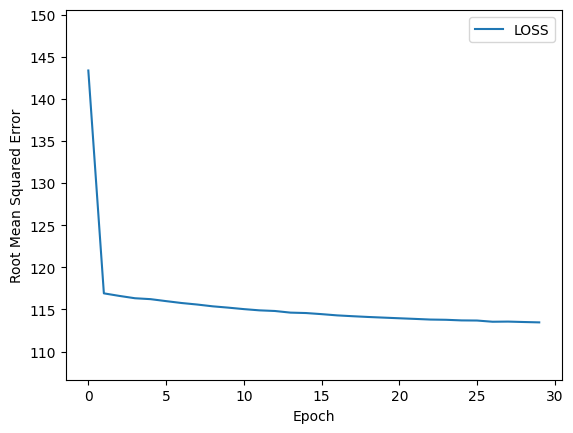


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 12207.5176 - root_mean_squared_error: 110.4876


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[12207.517578125, 110.48763275146484]

In [64]:
# The following are the hyperparameters
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# using the concatenate layer from TensorFlow Keras to
# merge multiple inputs tennsors along a specified axis(default axis = -1)
# The two Input layers are concatenated so they can be passed as a single
# tensor to a Dense layer.

preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())

#preprocessing_layer will be a tensor resulting from the
#concatenation of all input tensors specified in the inputs dictionary.

# creating a dense layer in a neural network using TensorFlow's Keras API.
# with preprocessing_layer as input to the dense layer
dense_output = layers.Dense(units=1, name='dense_layer')(preprocessing_layer)

# defining the outputs
outputs = {
    'dense_output': dense_output
}

# create and compile the model's topography
my_model = create_model(inputs, outputs, learning_rate)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_model.png", show_shapes=True)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# print out the models summary using summary method
my_model.summary(expand_nested=True)

# plotting the loss curve
plot_the_loss_curve(epochs, rmse)


print("\n: Evaluate the new model against the test set:")
# prepearing test data(test_features and test_label) then
# testing your model on the test_set using the evaluate method in TF.Keras
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)


Training the model with float representation didnt have much effect on the accuracy of the model we now chose to train the model using the bucket representation

Represent latitude and longitude in buckets
The model will learn a seperate weight for each bucket.
We are going to create 20 buckets
- 10 buckets for latitude
- 10 buckets for longitude



In [65]:
resolution_in_degrees = 0.04

# create a list of numbers representing the bucket boundaries for latitude
# based on the max and min values in the "latitude" column of train_df
# and stores it as a list
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# print latitude boundaries as a string
print("latitude boundaries: " + str(latitude_boundaries))
# print the number of buckets created
print("Number of buckets: " + str(len(latitude_boundaries)))

# Create a Discretization layer to separate the latitude data into buckets.
# Discretization layer in TensorFlow is suitable for converting continuous
# features into discrete ones by mapping input values to discrete bins.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries, # defines boundaries for discretization
    name='discretization_latitude')(inputs.get('latitude'))

# number of categories is the lenght of latitude_boundaries +1(number of bins + 1)
# to account for the out of vocabulary token
# perfoming category encoding: converting categorical features
# into one hot encoded representation
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

print(train_df['latitude'])
print()



# now do the same for longitude column
# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# print longitude boundaries as a string
print("longitude boundaries: " + str(longitude_boundaries))
# print the number of buckets created
print("Number of buckets: " + str(len(longitude_boundaries)))

# create a discretization layer to separate the longitude into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries = latitude_boundaries, # defines boundaries for discretization
    name='discretization_longitude')(inputs.get('longitude'))

# number of categories is the lenght of latitude_boundaries +1(number of bins + 1)
# perfom category one-hot encoding
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens = len(longitude_boundaries) + 1,
    output_mode = 'one_hot',
    name='category_encoding_longitude')(longitude)
print(train_df['longitude'])

latitude boundaries: [32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
Number of buckets: 9
4334    33.7
3975    33.8
6237    33.8
4535    34.1
10395   39.4
        ... 
1753    32.8
5171    34.0
13148   37.5
5205    33.8
4013    34.0
Name: latitude, Length: 17000, dtype: float64

longitude boundaries: [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]
Number of buckets: 10
4334    -118.0
3975    -118.0
6237    -118.2
4535    -118.0
10395   -120.2
         ...  
1753    -117.2
5171    -118.1
13148   -121.9
5205    -118.1
4013    -118.0
Name: longitude, Length: 17000, dtype: float64


Train the model with bucket representation


Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 12855.8232 - root_mean_squared_error: 113.3835
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 12854.9180 - root_mean_squared_error: 113.3795
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 12832.9385 - root_mean_squared_error: 113.2826
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 12831.7344 - root_mean_squared_error: 113.2772
Epoch 5/35
170/170 [==============================] - 1s 4ms/step - loss: 12810.6387 - root_mean_squared_error: 113.1841
Epoch 6/35
170/170 [==============================] - 1s 5ms/step - loss: 12812.4238 - root_mean_squared_error: 113.1920
Epoch 7/35
170/170 [==============================] - 1s 4ms/step - loss: 12804.9375 - root_mean_squared_error: 113.1589
Epoch 8/35
170/170 [==============================] - 1s 4ms/step - loss: 12798.1895 - root_mean_squared_error: 113.1291
Epoch 9/35
170/170 [=======================

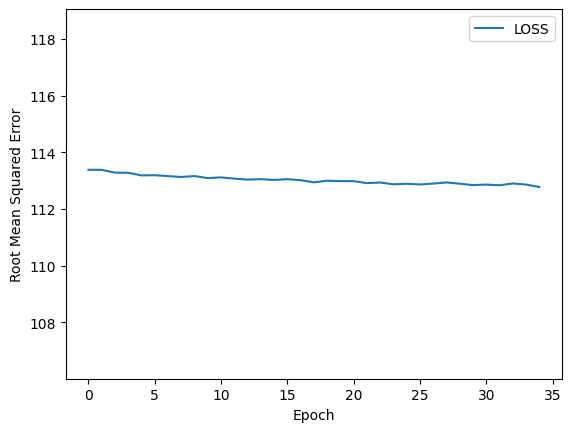


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 12520.0547 - root_mean_squared_error: 111.8931


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[12520.0546875, 111.89305114746094]

In [66]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model.
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Representing the location features in buckets outperfoms representing them as floating_points we can go further and representing location as feature cross

The previous represent location as 1D here we will represent location as a two-dimensional feature cross. That is, you'll cross the 10 or so latitude buckets with the 10 or so longitude buckets to create a grid of 100 cells.

The model will learn separate weights for each of the cells.


**Represent Location as feature cross**

The following code cell represents location as a feature cross. That is, the following code cell first creates buckets and then crosses the latitude and longitude features using a HashedCrossing layer.



In [67]:
resolution_in_degrees = 0.4

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cross the latitude and longitude features into a single one-hot vector.
# perfom the crossing using the HashedCrossing layer in tf.Keras
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

# adding a dense layer to the model
# connected to a feature cross named 'feature_cross'
dense_output = layers.Dense(units=1, name='dense_layer')(feature_cross)

# Define an output dictionary we'll send to the model constructor
outputs = {
  'dense_output': dense_output
}

Epoch 1/35
170/170 [==============================] - 1s 2ms/step - loss: 53721.8828 - root_mean_squared_error: 231.7798
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 48951.6953 - root_mean_squared_error: 221.2503
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 44499.0352 - root_mean_squared_error: 210.9479
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 40346.9805 - root_mean_squared_error: 200.8656
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 36489.5703 - root_mean_squared_error: 191.0224
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 32913.7109 - root_mean_squared_error: 181.4214
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 29634.6074 - root_mean_squared_error: 172.1471
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 26672.3574 - root_mean_squared_error: 163.3167
Epoch 9/35
170/170 [============

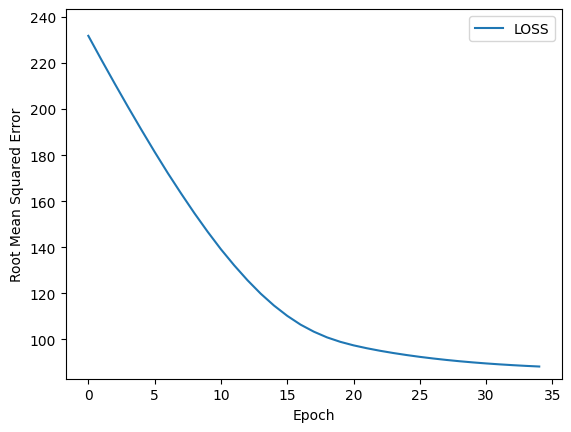


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 7852.3608 - root_mean_squared_error: 88.6135


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[7852.36083984375, 88.61354064941406]

In [68]:
#@title Train the model using the feature cross
# The following variables are the hyperparamters
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer:
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

Yes, representing these features as a feature cross produced much lower loss values than representing these features as buckets